In [1]:
!porder -h

usage: porder [-h]
              {version,readme,quota,shp2geojson,base64,simplify,idlist,difflist,idsplit,idcheck,bundles,order,ordersize,ostate,stats,download,multipart,multiproc}
              ...

Ordersv2 Simple Client

positional arguments:
  {version,readme,quota,shp2geojson,base64,simplify,idlist,difflist,idsplit,idcheck,bundles,order,ordersize,ostate,stats,download,multipart,multiproc}
    version             Prints porder version and exists
    readme              Go the web based porder readme page
    quota               Prints your Planet Quota Details
    shp2geojson         Convert all shapefiles in folder to GeoJSON
    base64              Base 64 encode a JSON file
    simplify            Simplifies geometry to number of vertices specified
                        using Visvalingam-Wyatt line simplification algorithm
    idlist              Get idlist using geometry & filters
    difflist            Checks the difference between local files and
                        a

To get help for a particular command, run that command with the `-h` flag

In [2]:
!porder idlist -h

usage: porder idlist [-h] --input INPUT --start START --end END --item ITEM
                     [--asset ASSET] --outfile OUTFILE [--cmin CMIN]
                     [--cmax CMAX] [--number NUMBER] [--overlap OVERLAP]
                     [--filters FILTERS [FILTERS ...]]

optional arguments:
  -h, --help            show this help message and exit

Required named arguments.:
  --input INPUT         Input geometry file for now geojson/json/kml
  --start START         Start date in format YYYY-MM-DD
  --end END             End date in format YYYY-MM-DD
  --item ITEM           Item Type PSScene4Band|PSOrthoTile|REOrthoTile etc
  --asset ASSET         Asset Type analytic, analytic_sr,visual etc
  --outfile OUTFILE     Output csv file

Optional named arguments:
  --cmin CMIN           Minimum cloud cover 0-1 represents 0 to 100
  --cmax CMAX           Maximum cloud cover 0-1 represents 0 to 100
  --number NUMBER       Total number of assets, give a large number if you are
                  

In [3]:
!pwd

/home/rave/temporal_mixing/notebooks


Don't worry about these deprecation warnings

In [1]:
!porder idlist --input "/home/rave/temporal_mixing/data/san_pedro_smaller_section.geojson" --start "2018-06-01" --end "2019-06-01" --item "PSScene4Band" --asset "analytic_sr" --outfile "/home/rave/temporal_mixing/data/idlist_all_instruments_standard.csv" --overlap "15" --cmax ".10" --filters string:quality_category:"standard" range:view_angle:-3:3 boolean:ground_control:True


Running search for a maximum of: 1000000 assets
Total number of assets written to /home/rave/temporal_mixing/data/idlist_all_instruments_standard.csv ===> 491
Total estimated cost to quota: 100,906 sqkm
Total estimated cost to quota if clipped: 29,110 sqkm


In [18]:
import pandas as pd

In [19]:
len(id_df)

2635

In [20]:
id_df = pd.read_csv("../data/idlist_all_instruments_standard.csv", header=None)

In [21]:
import dateutil.parser
id_df['date'] = id_df[0].apply(lambda x: pd.to_datetime(x[0:15], format="%Y%m%d_%H%M%S"))

In [22]:
id_df['dove_type'] = id_df[0].apply(lambda x: x[-4:])

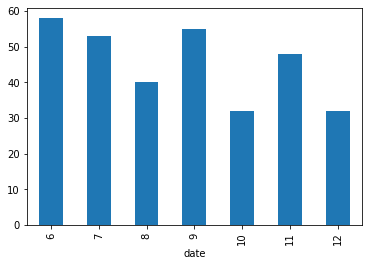

In [23]:
id_df["date"][(id_df['date'] > '2018-01-01') & (id_df['date'] < '2019-01-01')].groupby(id_df["date"].dt.month).count().plot(kind="bar")

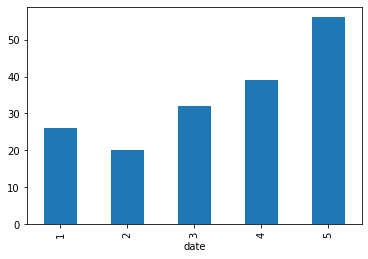

In [24]:
id_df["date"][(id_df['date'] > '2019-01-01') & (id_df['date'] < '2020-01-01')].groupby(id_df["date"].dt.month).count().plot(kind="bar")

In [25]:
!porder order -h

usage: porder order [-h] --name NAME --idlist IDLIST --item ITEM --bundle
                    BUNDLE [--sid SID] [--boundary BOUNDARY]
                    [--projection PROJECTION] [--kernel KERNEL]
                    [--compression COMPRESSION] [--aws AWS] [--azure AZURE]
                    [--gcs GCS] [--op OP [OP ...]]

optional arguments:
  -h, --help            show this help message and exit

Required named arguments.:
  --name NAME           Order Name to be Submitted
  --idlist IDLIST       CSV idlist with item IDs
  --item ITEM           Item Type PSScene4Band|PSOrthoTile|REOrthoTile etc
  --bundle BUNDLE       Bundle Type: analytic, analytic_sr,analytic_sr_udm2

Optional named arguments:
  --sid SID             Subscription ID
  --boundary BOUNDARY   Boundary/geometry for clip operation geojson|json|kml
  --projection PROJECTION
                        Projection for reproject operation of type "EPSG:4326"
  --kernel KERNEL       Resampling kernel used "near", "bilinear", "

Below we submit the **idlist.csv** with the order command. **Make sure to copy the url that is returned** as we will use that in the download step. It should take about 5 minutes for the order to complete. We select the `analytic_sr_udm2` bundle, which comes with surface reflectance, metadata, and two versions of Planet's Usable Data Mask. There are many operations supported besides `email`, making this one of the more powerful commands for controlling the extent, quality, and kind of data you get back from Planet, so [check out the order documentation for more details](https://github.com/samapriya/porder#order)

In [2]:
!porder order --name "San Pedro Test Intersects with Landsat and Sentinel" --idlist "/home/rave/temporal_mixing/data/idlist_all_instruments_standard.csv" --boundary "/home/rave/temporal_mixing/data/san_pedro_smaller_section.geojson" --item "PSScene4Band" --bundle "analytic_sr_udm2" --op harmonize clip zip email

Order created at https://api.planet.com/compute/ops/orders/v2/07f2a139-4599-42cc-912f-cc39947db871 and url copied to clipboard


You should receive an email when your order is complete, but you can also check on the status of your order with the following command. Initially it will show that an order is running for 1 user, when it is ready to download, it will show 0 running orders for user. You may see multiple folks running orders, in which case, check your email to see when the order you placed is complete.

In [30]:
!porder stats

Checking on all running orders...

Total queued order for organization: 0
Total running orders for organization: 0

Total queued orders for user: 0
Total running orders for user: 0


Once the order is complete, we can download it. This should go quick. You can copy the order id you receive in the email or the order url above and edit the order url below. If you get an `Key error` it is probably because you are running the below command with a different order URL.

In [4]:
!porder ordersize --url "https://api.planet.com/compute/ops/orders/v2/07f2a139-4599-42cc-912f-cc39947db871"

Polling ...
100% (60 of 60) |########################| Elapsed Time: 0:01:00 Time:  0:01:00
100% (60 of 60) |########################| Elapsed Time: 0:01:00 Time:  0:01:00
100% (60 of 60) |########################| Elapsed Time: 0:01:00 Time:  0:01:00
100% (60 of 60) |########################| Elapsed Time: 0:01:00 Time:  0:01:00
100% (60 of 60) |########################| Elapsed Time: 0:01:00 Time:  0:01:00
100% (60 of 60) |########################| Elapsed Time: 0:01:00 Time:  0:01:00
100% (60 of 60) |########################| Elapsed Time: 0:01:00 Time:  0:01:00
100% (60 of 60) |########################| Elapsed Time: 0:01:00 Time:  0:01:00
Total of 376 download objects with download size of 17.79 GB


In [35]:
!porder multiproc -h

usage: porder multiproc [-h] [--url URL] [--local LOCAL] [--ext EXT]

optional arguments:
  -h, --help     show this help message and exit
  --url URL      order url you got for your order
  --local LOCAL  Output folder where ordered files will be exported

Optional named arguments:
  --ext EXT      File Extension to download


In [ ]:
!porder multiproc --url "https://api.planet.com/compute/ops/orders/v2/07f2a139-4599-42cc-912f-cc39947db871" --local "/home/rave/temporal_mixing/data/downloads"

Polling with exponential backoff..
Order completed with status: success
Processing a url list with 752 items


File                                                                                                 Completed at        
PSScene4Band_20190314_170117_1043_analytic_sr_udm2_manifest.json                                     405.54s             
PSScene4Band_20190324_170050_1052_analytic_sr_udm2_manifest.json                                     405.55s             
PSScene4Band_20190103_173615_1035_analytic_sr_udm2_manifest.json                                     405.55s             
PSScene4Band_20190422_173957_103d_analytic_sr_udm2_manifest.json                                     405.58s             
PSScene4Band_20180706_172952_1014_analytic_sr_udm2_manifest.json                                     405.59s             
PSScene4Band_20181209_173125_0e14_analytic_sr_udm2_manifest.json                                     405.66s             
PSScene4Band_20181123_173411_0f35_a

In [ ]:
import xarray as xa
import rioxarray
%matplotlib inline
xa.set_options(display_style = "text")

In [ ]:
san_pedro_sr = xa.open_rasterio("data/20190606_164931_104b_3B_AnalyticMS_SR.tif")
san_pedro_sr

In [ ]:
san_pedro_sr_bgr = san_pedro_sr.sel(band=slice(1,3)) # we make a new variable, keeping the blue, green, and red bands

In [ ]:
san_pedro_sr_rgb = san_pedro_sr_bgr[::-1, ...] # reversing the order of the band axis from bgr to rgb

The in python we can use xarray's `imshow` function to plot single band or rgb data. `robust=True` clips the visualization to the minimum and maximum values in the dataset.

In [ ]:
%matplotlib inline
subset = san_pedro_sr_rgb[:,2000:3000,2000:3000]
subset.plot.imshow(robust=True)

In [ ]:
import pandas as pd
pd.read_json("data/20190606_164931_104b_metadata.json").drop("geometry", axis=1)